# **Capstone Project: UK House Sales Analysis for 2021**

*Author: (Your full name here)*

**About Dataset**

This dataset captures detailed information about real estate transactions across various towns. Each row represents a single property transaction with multiple attributes describing the property and the transaction details. Below is an explanation of each column present in the dataset:

* **List Year (numeric data):** This column indicates the year in which the
property was listed for sale. It is a numeric field, typically representing the year in four digits (e.g., 2021).

* **Town (text data):** This column contains the name of the town where the property is located. It is a text field with town names such as "Fairfield," "Bloomfield," etc.

* **Address (text data):** This column provides the full street address of the property. It is a text field that includes details such as street number, street name, and unit number if applicable.

* **Assessed Value (numeric data):** This column represents the assessed value of the property. It is a numeric field indicating the value assigned to the property by the local government for taxation purposes. This value is used to calculate property taxes.

* **Sale Amount (numeric data):** This column indicates the actual sale amount of the property. It is a numeric field representing the price at which the property was sold.

* **Sales Ratio (numeric data):** This column shows the sales ratio, which is calculated as the sale amount divided by the assessed value. It is a numeric field that helps in understanding how the sale price compares to the assessed value.

* **Property Type (text data):** This column describes the type of property. It is a text field with categories such as "Residential," indicating that the property is used for residential purposes.

* **Residential Type (text data):** This column provides additional details about the residential property type. It is a text field with categories like "Single Family," "Condo," or "Two Family," specifying the nature of the residential unit.

Upload the dataset. Show first 5 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('houses.xlsx')
df.head()

,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2021,Canaan,0 ASPEN HILL DR,183800,220395.0,0.833957,Vacant Land,NaN
1,2021,Naugatuck,0 BRIDGE STREET,92690,150000.0,0.617900,Vacant Land,NaN
2,2021,Canterbury,0 MILLER RD,46400,68000.0,0.682300,Vacant Land,NaN
3,2021,Naugatuck,0 MISTYWOOD,40710,30000.0,1.357000,Vacant Land,NaN
4,2021,Naugatuck,0 SHERMAN STREET,35940,25000.0,1.437600,Vacant Land,NaN


Give brief information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   List Year         2469 non-null   int64  
 1   Town              2469 non-null   object 
 2   Address           2469 non-null   object 
 3   Assessed Value    2469 non-null   int64  
 4   Sale Amount       2469 non-null   float64
 5   Sales Ratio       2469 non-null   float64
 6   Property Type     2469 non-null   object 
 7   Residential Type  2272 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 154.4+ KB


Remove the Year column since the data value is all same for this column and it is 2021.

In [4]:
# Drop the 'List Year' column
df = df.drop(columns=['List Year'])

# Display the first few rows of the updated DataFrame
print(df.head())

         Town           Address  Assessed Value  Sale Amount  Sales Ratio  \
0      Canaan   0 ASPEN HILL DR          183800     220395.0     0.833957   
1   Naugatuck   0 BRIDGE STREET           92690     150000.0     0.617900   
2  Canterbury       0 MILLER RD           46400      68000.0     0.682300   
3   Naugatuck       0 MISTYWOOD           40710      30000.0     1.357000   
4   Naugatuck  0 SHERMAN STREET           35940      25000.0     1.437600   

  Property Type Residential Type  
0   Vacant Land              NaN  
1   Vacant Land              NaN  
2   Vacant Land              NaN  
3   Vacant Land              NaN  
4   Vacant Land              NaN  


Check if the datatype of Assessed Value and Sale Amount is integer, if not, convert the columns to integer value. In the same manner, check if Sales Ratio is float integer.

In [5]:
#

Using Statistics module, calculate the mean and median of both Sale Amount and Sales Ratio column. Save mean value of Sale amount as ***mean_price*** variable.

In [6]:
import statistics as st

In [7]:
# Extract the Sale Amount and Sales Ratio columns
sale_amount = df['Sale Amount']
sales_ratio = df['Sales Ratio']

# Calculate mean and median of Sale Amount
mean_sale_amount = st.mean(sale_amount)
median_sale_amount = st.median(sale_amount)

# Calculate mean and median of Sales Ratio
mean_sales_ratio = st.mean(sales_ratio)
median_sales_ratio = st.median(sales_ratio)

# Save mean value of Sale Amount as mean_price
mean_price = mean_sale_amount

# Print the results
print(f"Mean Sale Amount: {mean_sale_amount}")
print(f"Median Sale Amount: {median_sale_amount}")
print(f"Mean Sales Ratio: {mean_sales_ratio}")
print(f"Median Sales Ratio: {median_sales_ratio}")
print(f"Mean Price (Sale Amount): {mean_price}")

Mean Sale Amount: 472617.2095747266
Median Sale Amount: 310000.0
Mean Sales Ratio: 0.5853752601494532
Median Sales Ratio: 0.5212
Mean Price (Sale Amount): 472617.2095747266


Now use mean_price variable. Create a new column. Name it Price Category. Using loop, populate your column with following criteria:
*   if *sales_amount<= 0.75(mean_price)* then it is Affordable
*   if *0.75(mean_price)<sales_amount<= 1.25(mean_price)* then it is Average
*   if *sales_amount> 1.25(mean_price)* then it is Expensive


In [8]:
# Define the function to categorize price
def categorize_price(sale_amount, mean_price):
    if sale_amount <= 0.75 * mean_price:
        return 'Expensive'
    elif 0.75 * mean_price < sale_amount <= 1.25 * mean_price:
        return 'Average'
    else:
        return 'Affordable'

# Create the Price Category column using a loop
df['Price Category'] = df['Sale Amount'].apply(lambda x: categorize_price(x, mean_price))

# Display the first few rows of the updated DataFrame
print(df.head())

         Town           Address  Assessed Value  Sale Amount  Sales Ratio  \
0      Canaan   0 ASPEN HILL DR          183800     220395.0     0.833957   
1   Naugatuck   0 BRIDGE STREET           92690     150000.0     0.617900   
2  Canterbury       0 MILLER RD           46400      68000.0     0.682300   
3   Naugatuck       0 MISTYWOOD           40710      30000.0     1.357000   
4   Naugatuck  0 SHERMAN STREET           35940      25000.0     1.437600   

  Property Type Residential Type Price Category  
0   Vacant Land              NaN      Expensive  
1   Vacant Land              NaN      Expensive  
2   Vacant Land              NaN      Expensive  
3   Vacant Land              NaN      Expensive  
4   Vacant Land              NaN      Expensive  


Create a function which calculates annual tax for each house and prints it. Assuming that annual tax for the house is 1.5%, print the Sale Amount value and Annual tax for first 20 houses in your list.

In [9]:
# Define the function to calculate annual tax
def calculate_annual_tax(sale_amount):
    return sale_amount * 0.015

# Print Sale Amount and Annual Tax for the first 20 houses
def print_annual_tax_for_houses(df):
    print(f"{'Index':<6} {'Sale Amount':<12} {'Annual Tax':<12}")
    print("-" * 30)
    for index, row in df.head(20).iterrows():
        sale_amount = row['Sale Amount']
        annual_tax = calculate_annual_tax(sale_amount)
        print(f"{index:<6} {sale_amount:<12.2f} {annual_tax:<12.2f}")

# Call the function to print the annual tax for the first 20 houses
print_annual_tax_for_houses(df)

Index  Sale Amount  Annual Tax  
------------------------------
0      220395.00    3305.92     
1      150000.00    2250.00     
2      68000.00     1020.00     
3      30000.00     450.00      
4      25000.00     375.00      
5      150000.00    2250.00     
6      140000.00    2100.00     
7      155000.00    2325.00     
8      139900.00    2098.50     
9      180000.00    2700.00     
10     1600000.00   24000.00    
11     615000.00    9225.00     
12     1055000.00   15825.00    
13     320000.00    4800.00     
14     514085.00    7711.27     
15     396000.00    5940.00     
16     620000.00    9300.00     
17     176000.00    2640.00     
18     599000.00    8985.00     
19     295000.00    4425.00     


Count how many missing values you have in the Residential Type column

In [10]:
# Count the number of missing values in the 'Residential Type' column
missing_values_count = df['Residential Type'].isna().sum()

# Print the result
print(f"Number of missing values in 'Residential Type' column: {missing_values_count}")

Number of missing values in 'Residential Type' column: 197


Populate the missing values in Residential Type with following values from Property Type:
*   if it is Apartments then fill with Apartment
*   if it is Commercial then fill with Business Building
*   if it is Industrial then fill with Industry Building
*   if it is Vacant Land then fill with Land



In [11]:
# Define a function to fill missing values in Residential Type based on Property Type
def fill_residential_type(row):
    if pd.isna(row['Residential Type']):
        if row['Property Type'] == 'Apartments':
            return 'Apartment'
        elif row['Property Type'] == 'Commercial':
            return 'Business Building'
        elif row['Property Type'] == 'Industrial':
            return 'Industry Building'
        elif row['Property Type'] == 'Vacant Land':
            return 'Land'
    return row['Residential Type']

# Apply the function to the DataFrame
df['Residential Type'] = df.apply(fill_residential_type, axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())

         Town           Address  Assessed Value  Sale Amount  Sales Ratio  \
0      Canaan   0 ASPEN HILL DR          183800     220395.0     0.833957   
1   Naugatuck   0 BRIDGE STREET           92690     150000.0     0.617900   
2  Canterbury       0 MILLER RD           46400      68000.0     0.682300   
3   Naugatuck       0 MISTYWOOD           40710      30000.0     1.357000   
4   Naugatuck  0 SHERMAN STREET           35940      25000.0     1.437600   

  Property Type Residential Type Price Category  
0   Vacant Land             Land      Expensive  
1   Vacant Land             Land      Expensive  
2   Vacant Land             Land      Expensive  
3   Vacant Land             Land      Expensive  
4   Vacant Land             Land      Expensive  


Check your dataset if any missing value remains

In [12]:
df['Residential Type']

0                Land
1                Land
2                Land
3                Land
4                Land
            ...      
2464             Land
2465             Land
2466    Single Family
2467             Land
2468             Land
Name: Residential Type, Length: 2469, dtype: object

Create a class named Property with attributes for List Year (deafult=2021), Town, Address, Assessed Value, Sale Amount, Sales Ratio, Property Type, and Residential Type. Add methods to the Property class to display the property details. Create 20 objects using this class from the dataset with loop method.

In [13]:
# Define the Property class
class Property:
    def __init__(self, list_year=2021, town="", address="", assessed_value=0.0, sale_amount=0.0, sales_ratio=0.0, property_type="", residential_type=""):
        self.list_year = list_year
        self.town = town
        self.address = address
        self.assessed_value = assessed_value
        self.sale_amount = sale_amount
        self.sales_ratio = sales_ratio
        self.property_type = property_type
        self.residential_type = residential_type

    def display_details(self):
        print(f"List Year: {self.list_year}")
        print(f"Town: {self.town}")
        print(f"Address: {self.address}")
        print(f"Assessed Value: {self.assessed_value}")
        print(f"Sale Amount: {self.sale_amount}")
        print(f"Sales Ratio: {self.sales_ratio}")
        print(f"Property Type: {self.property_type}")
        print(f"Residential Type: {self.residential_type}")
        print()

# Create 20 Property objects from the dataset
properties = []

for index, row in df.head(20).iterrows():
    property_obj = Property(
        list_year=row.get('List Year', 2021),
        town=row['Town'],
        address=row['Address'],
        assessed_value=row['Assessed Value'],
        sale_amount=row['Sale Amount'],
        sales_ratio=row['Sales Ratio'],
        property_type=row['Property Type'],
        residential_type=row['Residential Type']
    )
    properties.append(property_obj)

# Display details of the created Property objects
for property_obj in properties:
    property_obj.display_details()

List Year: 2021
Town: Canaan
Address: 0 ASPEN HILL DR
Assessed Value: 183800
Sale Amount: 220395.0
Sales Ratio: 0.833957213
Property Type: Vacant Land
Residential Type: Land

List Year: 2021
Town: Naugatuck
Address: 0 BRIDGE STREET
Assessed Value: 92690
Sale Amount: 150000.0
Sales Ratio: 0.6179
Property Type: Vacant Land
Residential Type: Land

List Year: 2021
Town: Canterbury
Address: 0 MILLER RD
Assessed Value: 46400
Sale Amount: 68000.0
Sales Ratio: 0.6823
Property Type: Vacant Land
Residential Type: Land

List Year: 2021
Town: Naugatuck
Address: 0 MISTYWOOD
Assessed Value: 40710
Sale Amount: 30000.0
Sales Ratio: 1.357
Property Type: Vacant Land
Residential Type: Land

List Year: 2021
Town: Naugatuck
Address: 0 SHERMAN STREET
Assessed Value: 35940
Sale Amount: 25000.0
Sales Ratio: 1.4376
Property Type: Vacant Land
Residential Type: Land

List Year: 2021
Town: Lyme
Address: 0 STERLING CITY ROAD
Assessed Value: 115400
Sale Amount: 150000.0
Sales Ratio: 0.7693
Property Type: Vacant Lan

Using group-by method, find average house price (Sale Amount) for each property type.

Using count method, count how many houses are sold in each city.

In [14]:
# Count the number of houses sold in each city
houses_sold_per_city = df['Town'].value_counts()

# Print the result
print(houses_sold_per_city)

Town
Bridgeport    202
Danbury       144
Bristol       142
Hamden        140
Fairfield     121
             ... 
Bozrah          4
Canaan          4
Eastford        2
Meriden         1
Franklin        1
Name: count, Length: 69, dtype: int64


Create a bar chart showing the average Sale Amount for each town using Matplotlib

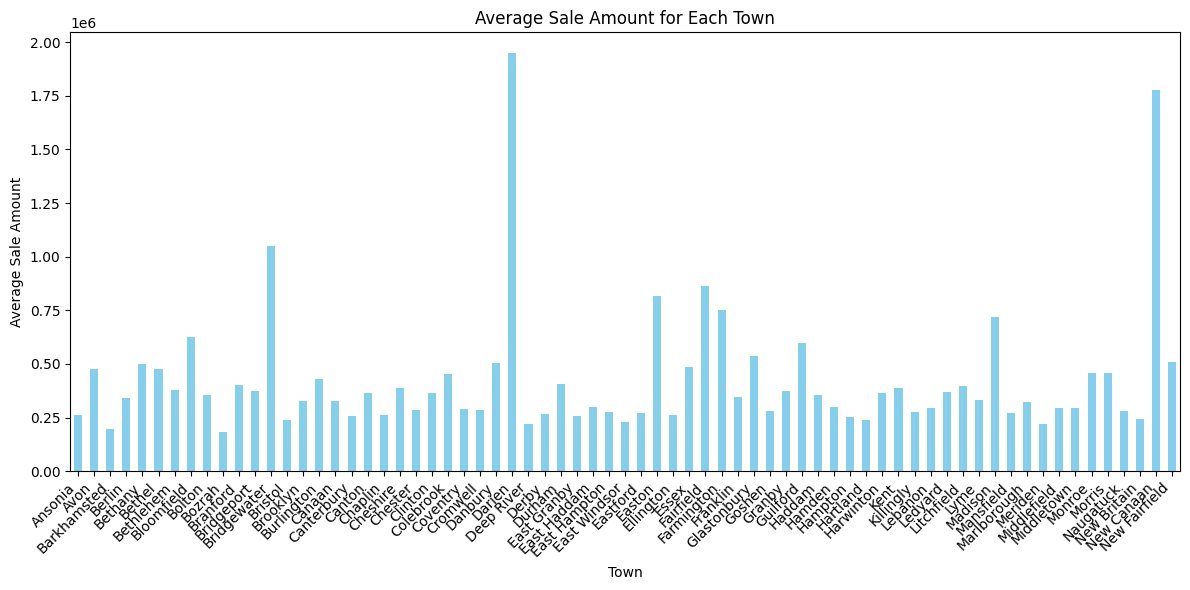

In [15]:
# Calculate the average Sale Amount for each town
average_sale_amount_per_town = df.groupby('Town')['Sale Amount'].mean()

# Plot the bar chart
plt.figure(figsize=(12, 6))
average_sale_amount_per_town.plot(kind='bar', color='skyblue')
plt.title('Average Sale Amount for Each Town')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the bar chart
plt.show()

Create a scatter plot to visualize the relationship between Assessed Value and Sale Amount using Matplotlib.

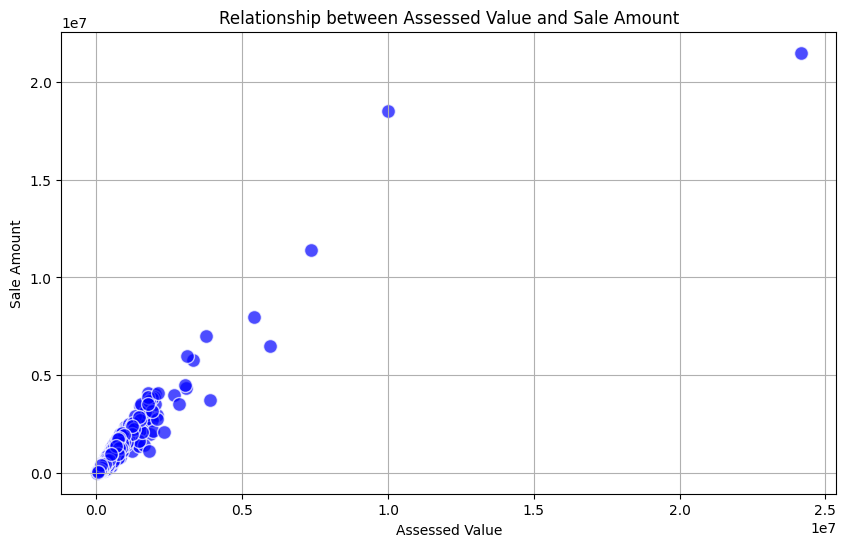

In [16]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Assessed Value'], df['Sale Amount'], alpha=0.7, color='blue', edgecolor='w', s=100)
plt.title('Relationship between Assessed Value and Sale Amount')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.grid(True)

# Display the scatter plot
plt.show()

Apart from Matplotlib, the Seaborn library is also one of commonly used libraries to sketch graph. Create a box plot to compare the Sale Amount across different Residential Type categories using Seaborn.

<ipython-input-19-75ccfbe62ece>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Residential Type', y='Sale Amount', data=df, palette='Set2')


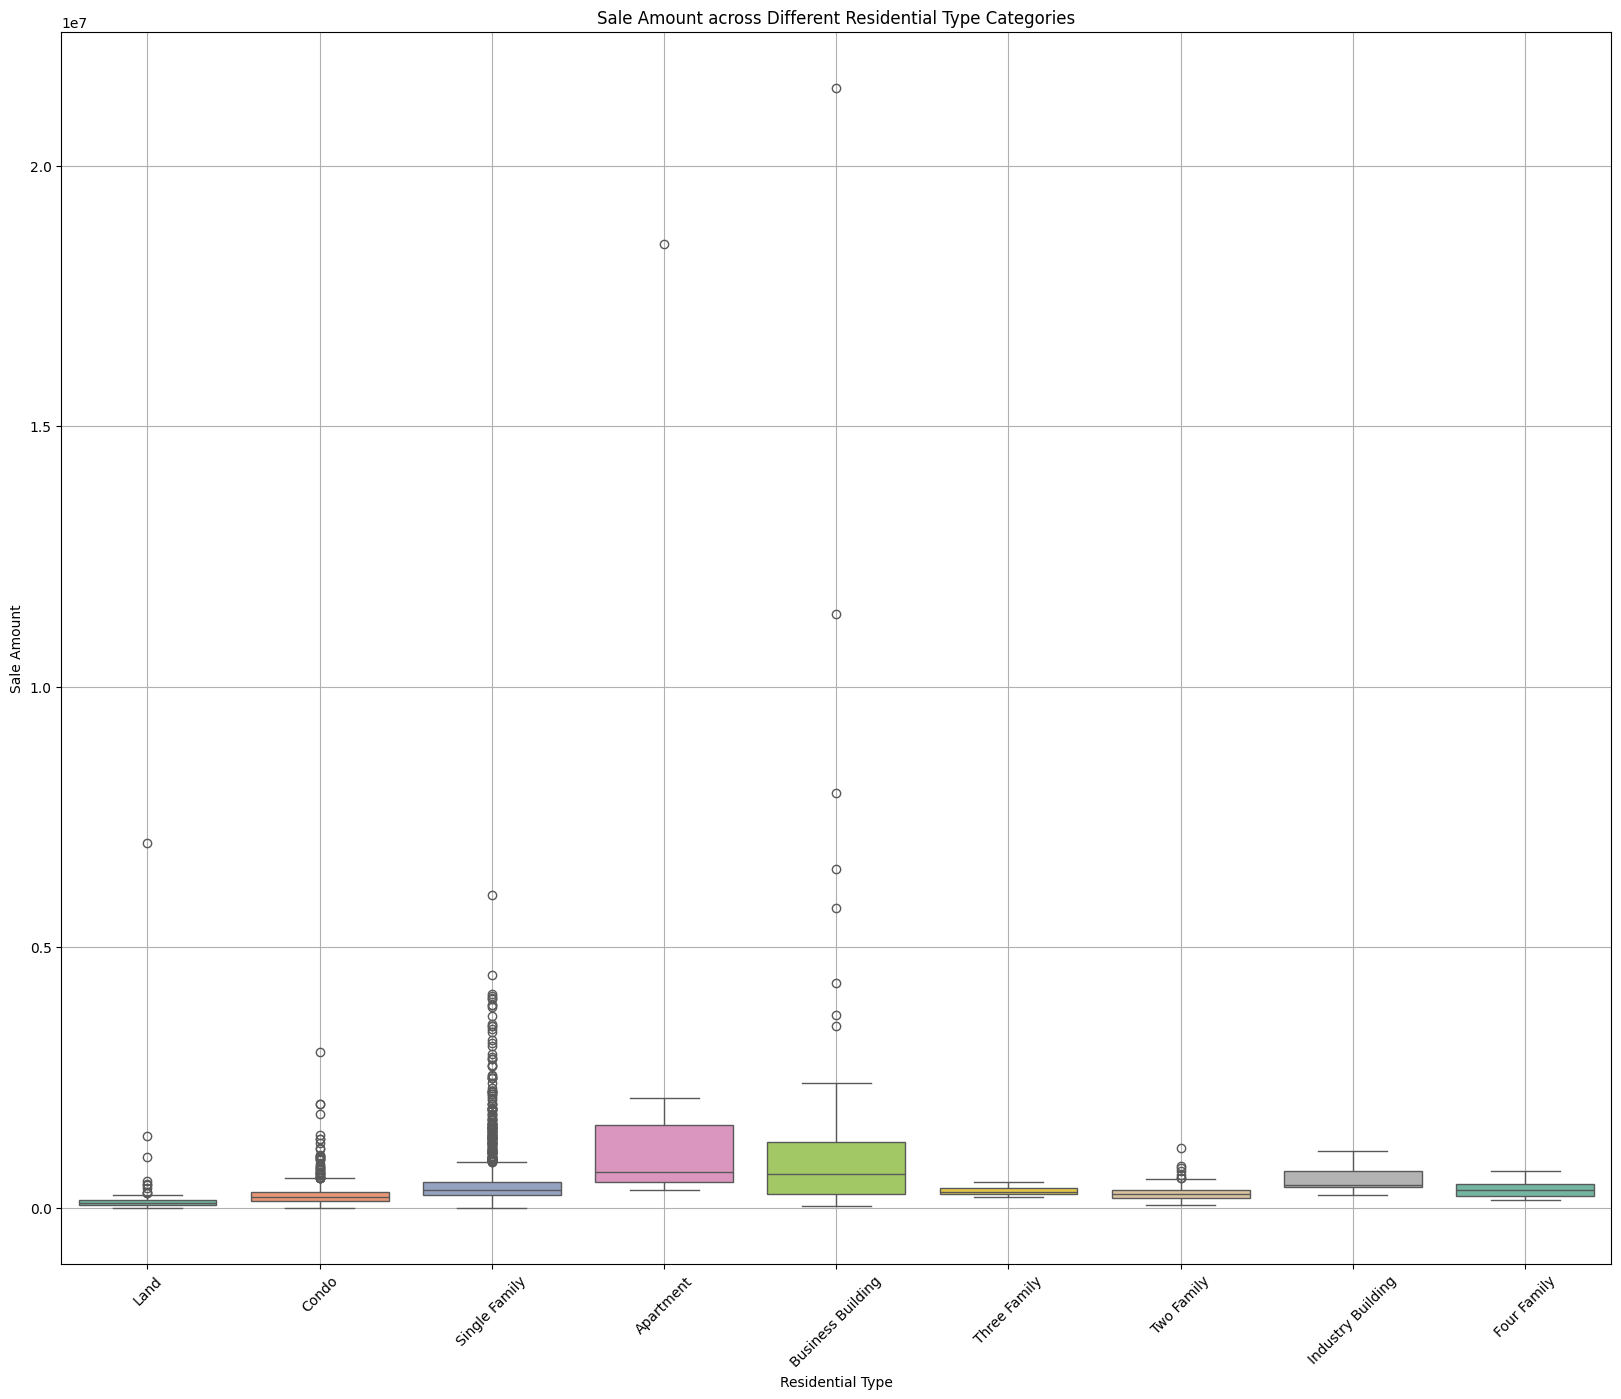

In [19]:
# Create the box plot
plt.figure(figsize=(20, 16))
sns.boxplot(x='Residential Type', y='Sale Amount', data=df, palette='Set2')
plt.title('Sale Amount across Different Residential Type Categories')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Display the box plot
plt.show()

Using loop and string manipulation, count, how many of the houses are placed on "BOULEVARD". You need to extract that word from address.

In [20]:
# Initialize the count
boulevard_count = 0

# Loop through the 'Address' column and count occurrences of 'BOULEVARD'
for address in df['Address']:
    if 'BOULEVARD' in address.upper():  # Convert to uppercase to ensure case-insensitivity
        boulevard_count += 1

# Print the count
print(f"Number of houses placed on BOULEVARD: {boulevard_count}")

Number of houses placed on BOULEVARD: 7


Summaize your data with group-by with respect to Property type and Sale Amount average. Next, sort it in descending form.

In [21]:
# Group by 'Property Type' and calculate the average 'Sale Amount'
summary = df.groupby('Property Type')['Sale Amount'].mean()

# Sort the summary in descending order
sorted_summary = summary.sort_values(ascending=False)

# Print the summarized and sorted data
print(sorted_summary)

Property Type
Apartments     2.182222e+06
Commercial     1.400683e+06
Industrial     5.544444e+05
Residential    4.360228e+05
Vacant Land    2.166382e+05
Name: Sale Amount, dtype: float64


Create a pie chart with all necessary information on it which shows the portion for each of  Property Type sold.

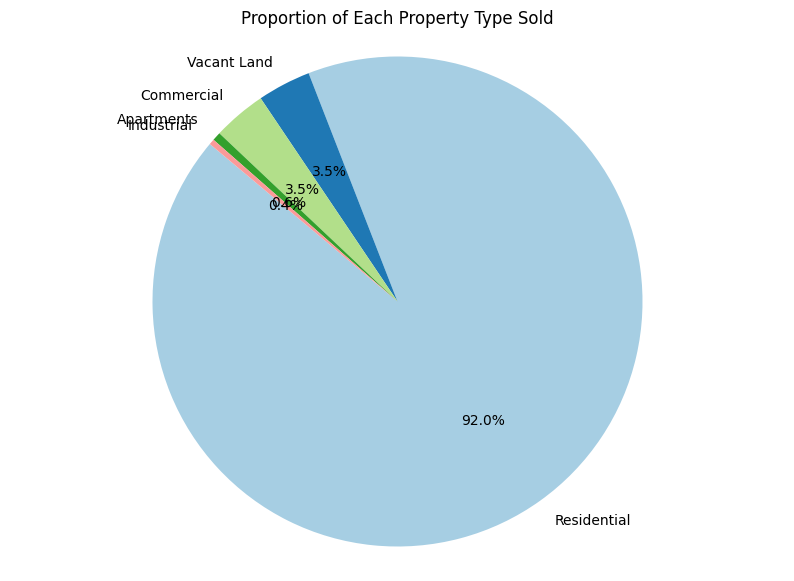

In [22]:
 #Calculate the count of each Property Type
property_type_counts = df['Property Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    property_type_counts,
    labels=property_type_counts.index,
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=140,    # Start angle of the pie chart
    colors=plt.cm.Paired(range(len(property_type_counts)))  # Use a colormap
)
plt.title('Proportion of Each Property Type Sold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Display the pie chart
plt.show()

Ask from user City name and Maxmimum house price they can afford. Next, filter your data accordingly and print affordable houses in the mentioned city for the user. Use City name and Sale Amount for reference.

In [23]:
# Ask the user for input
city_name = input("Enter the city name: ")
max_price = float(input("Enter the maximum house price you can afford: "))

# Filter the DataFrame based on the user input
affordable_houses = df[(df['Town'].str.lower() == city_name.lower()) & (df['Sale Amount'] <= max_price)]

# Print the results
if not affordable_houses.empty:
    print(f"Affordable houses in {city_name}:")
    print(affordable_houses[['Address', 'Sale Amount']])
else:
    print(f"No affordable houses found in {city_name} within the specified price range.")

Enter the city name: Bristol
Enter the maximum house price you can afford: 100000
Affordable houses in Bristol:
                         Address  Sale Amount
119               107 ARCADIA RD     52966.00
135            108 GEORGETOWN RD    100000.00
299             125 WEST ST UN 2     60000.00
300       125 WEST ST., UNIT #10     60150.00
1189  295 REDSTONE HILL RD UN 31     90000.00
1190  295 REDSTONE HILL RD., #11     85000.00
1254                 31 EBERT RD     51752.94
1337        33 LAKESIDE DR UN 39     69000.00
1403       35 RUTH ST., UNIT #21     99900.00
1545       40 MATTHEWS ST., #34A     75000.00
1595          420 EMMETT ST UN D     96000.00
2204         79 BETHS AVE UN 100     92000.00
2404          94 CORBIN RIDGE RD    100000.00


**Acknowledgement Note**

This project was developed during the Essentials of Python course. Special thanks to Dr. Bektur Abdisatarov and Dr. Ochilbek Rakhmanov for their invaluable contributions and guidance throughout the course. Their expertise and support were instrumental in the successful completion of this project.